In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
import os
cwd = '/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data'
for dirname, _, filenames in os.walk(cwd):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/test.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/train.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/sample_submission.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/ohe_city_tier.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_ADDRESS_classes.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_city_tier.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_ADDRESS.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/ohe_POSTED_BY.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_city_tier_classes.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_POSTED_BY.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_BHK_OR_RK_classes.sav
/Users/lukemcevoy/Develop/stevens/f21

In [153]:
data = pd.read_csv('/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/train.csv')
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [155]:
data['ADDRESS'] = data['ADDRESS'].str.split(',').apply(lambda x: x[-1])

In [156]:
data['ADDRESS'].value_counts(ascending=False).head(25)

Bangalore        4340
Lalitpur         2993
Mumbai           2023
Pune             1991
Noida            1767
Kolkata          1709
Maharashtra      1579
Chennai          1255
Ghaziabad        1087
Jaipur            962
Chandigarh        696
Faridabad         649
Mohali            556
Vadodara          510
Gurgaon           430
Surat             423
Nagpur            336
Lucknow           327
Indore            306
Bhubaneswar       235
Bhopal            218
Kochi             205
Visakhapatnam     179
Bhiwadi           161
Coimbatore        149
Name: ADDRESS, dtype: int64

In [157]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
data['city_tier'] = data['ADDRESS'].apply(map_city)

<AxesSubplot:xlabel='PRICE_IN_LACS', ylabel='Count'>

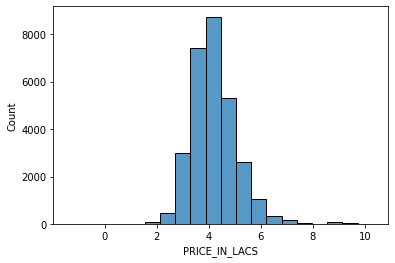

In [158]:
data['PRICE_IN_LACS'] = np.log(data['TARGET(PRICE_IN_LACS)'])
sns.histplot(data['PRICE_IN_LACS'], bins=20)

<AxesSubplot:xlabel='area', ylabel='Count'>

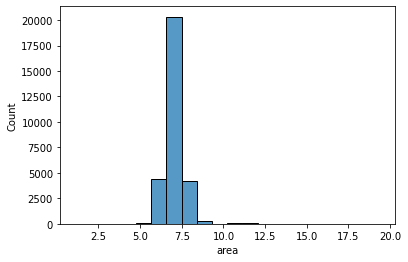

In [159]:
# taking log of square_ft as well
data['area'] = np.log(data['SQUARE_FT'])
sns.histplot(data['area'], bins=20)

In [160]:
def plot_numerical(feature):
    sns.lmplot(x=feature, y='TARGET(PRICE_IN_LACS)', data=data)
    plt.show()
    
def plot_categorical(feature, figsize=None):
    df = data.groupby([feature])['TARGET(PRICE_IN_LACS)'].describe()[['mean', '50%', 'min', 'count']]

    labels = df.index.values
    x = np.arange(len(labels))
    width = 0.9
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # plot bars for min, median and mean house price
    rects1 = ax1.bar(x-width/2, df['50%'], width/3, label='median')
    rects2 = ax1.bar(x-width/6, df['mean'], width/3, label='mean')
    rects3 = ax1.bar(x+width/6, df['min'], width/3, label='min')

    ax1.set_ylabel('PRICE_IN_LACS', fontsize=12)
    ax1.set_title(feature, fontsize=15)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=0)
    ax1.legend()

    # plot counts of data points
    ax2 = ax1.twinx()
    ax2.set_ylabel('Counts', fontsize=12)
    ax2.plot(x-width/2, df['count'], color='red', linestyle='dashed')

    # annotate counts of data points
    for i, rect in enumerate(rects2):
        height = int(round(rect.get_height()))
        ax1.annotate('{}'.format(int(df['count'].iloc[i])),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', color='red')
    plt.show()

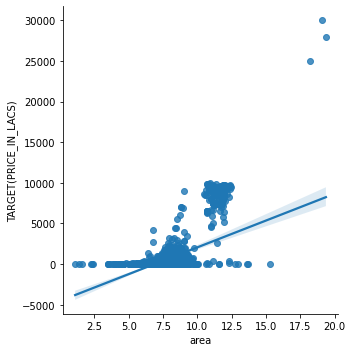

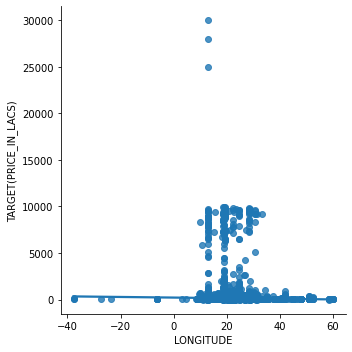

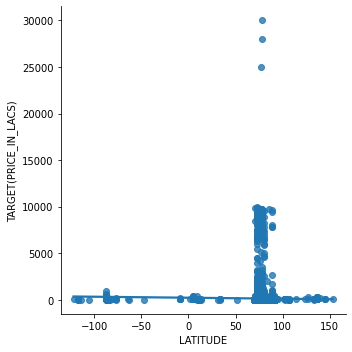

In [161]:
for feature in ['area','LONGITUDE', 'LATITUDE']:
    plot_numerical(feature)

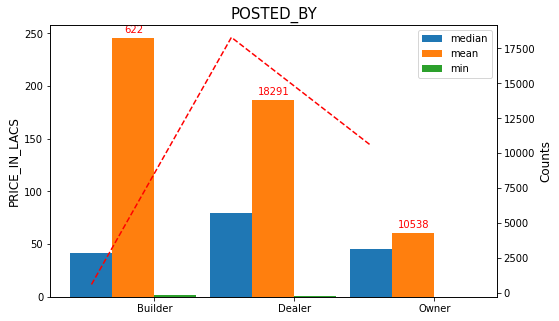

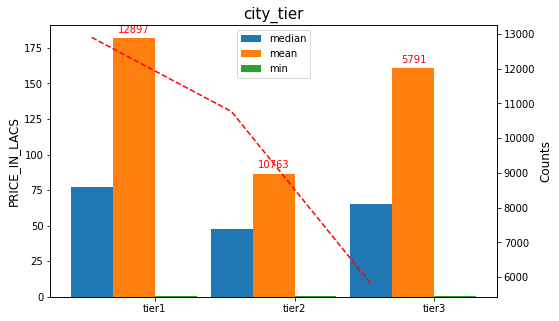

In [162]:
for feature in ['POSTED_BY', 'city_tier']:
    plot_categorical(feature)

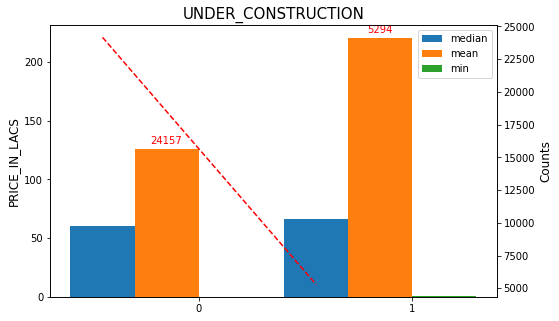

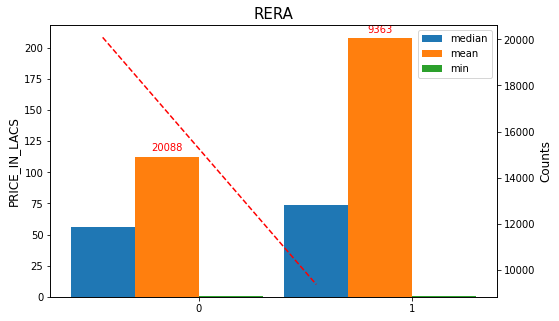

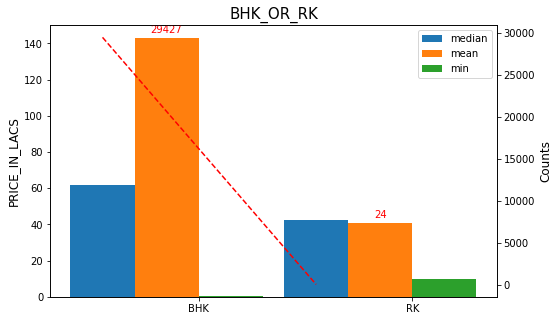

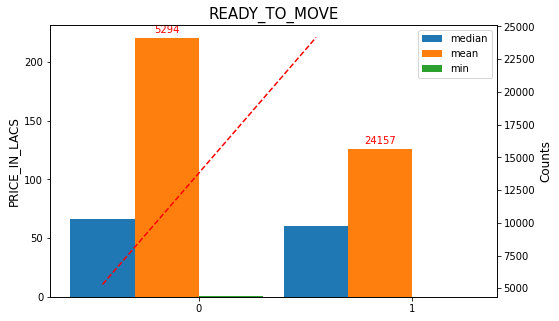

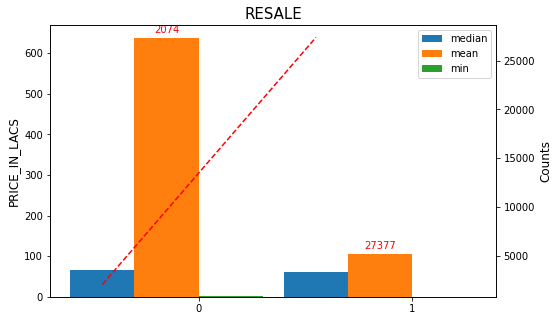

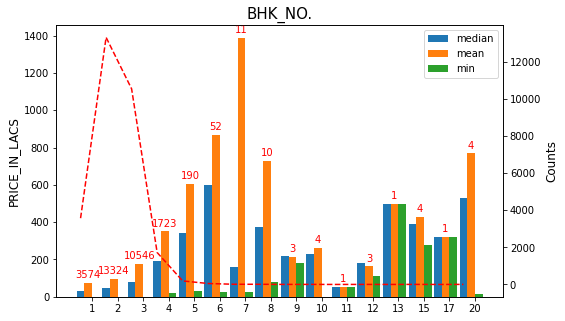

In [163]:
for feature in ['UNDER_CONSTRUCTION', 'RERA', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE', 'BHK_NO.']:
    plot_categorical(feature)

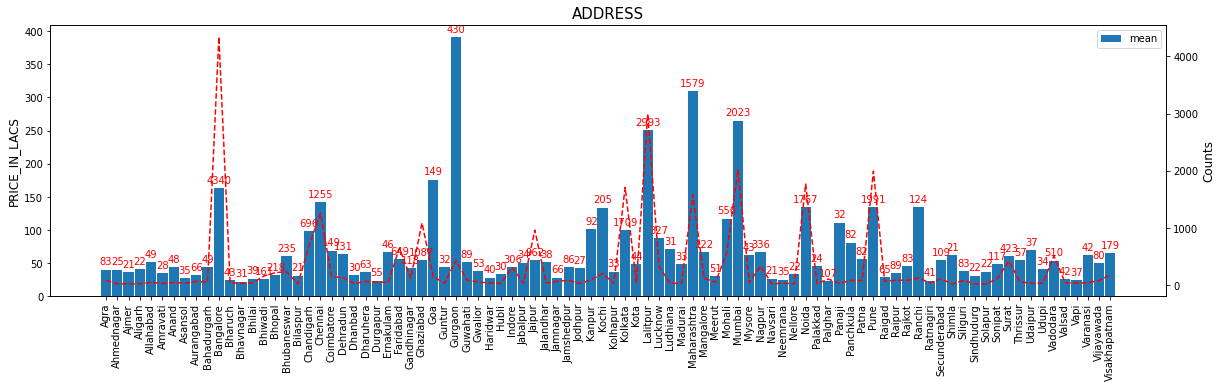

In [164]:
df = data.groupby(['ADDRESS'])['TARGET(PRICE_IN_LACS)'].describe()[['mean', 'count']]
df = df[df['count']>20]

labels = df.index.values
x = np.arange(len(labels))
fig, ax1 = plt.subplots(figsize=(20, 5))
width = 0.9

# plot bars for min, median and mean house price
rects = ax1.bar(x, df['mean'], width, label='mean')

ax1.set_ylabel('PRICE_IN_LACS', fontsize=12)
ax1.set_title('ADDRESS', fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90)
ax1.legend()

# plot counts of data points
ax2 = ax1.twinx()
ax2.set_ylabel('Counts', fontsize=12)
ax2.plot(x, df['count'], color='red', linestyle='dashed')

# annotate counts of data points
for i, rect in enumerate(rects):
    height = int(round(rect.get_height()))
    ax1.annotate('{}'.format(int(df['count'].iloc[i])),
                 xy=(rect.get_x() + rect.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', color='red')
plt.show()

In [165]:
categorical_features = ['POSTED_BY', 'BHK_OR_RK', 'city_tier', 'ADDRESS']
numerical_features = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area']

In [166]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib

In [167]:
df = data.copy()
path = cwd
for i, feature in enumerate(categorical_features):
    le = LabelEncoder()

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    #print(feature)
    
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))

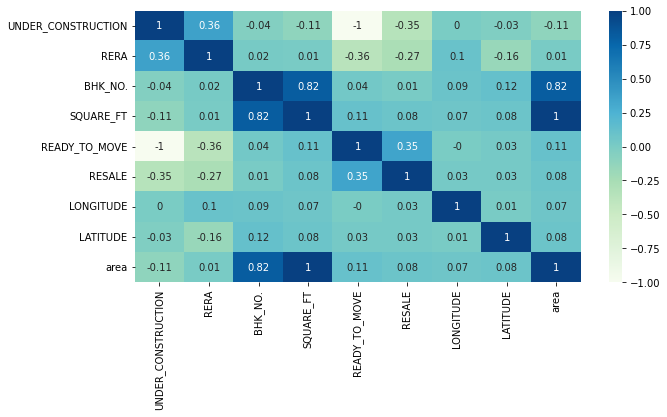

In [168]:
# Bivariate Analysis Correlation plot for numerical features
plt.figure(figsize=(10, 5))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

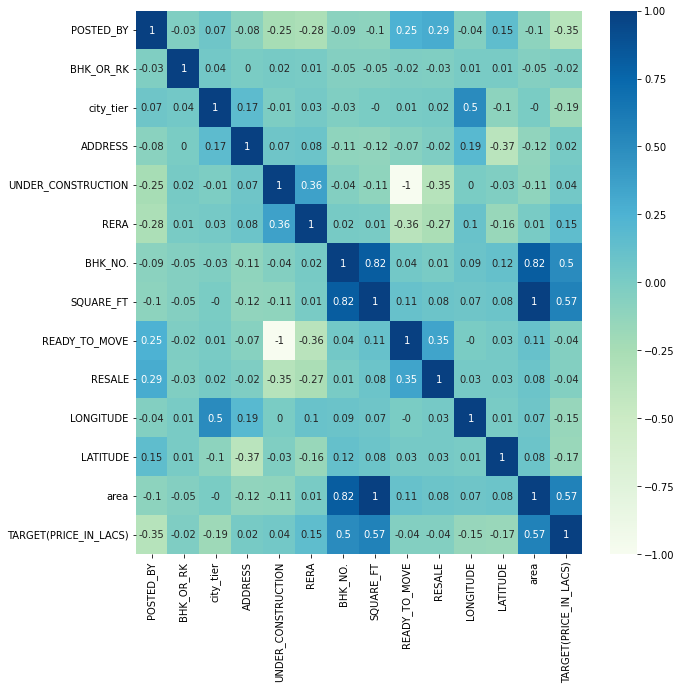

In [169]:
# Bivariate Analysis Correlation plot with the Categorical variables
plt.figure(figsize=(10, 10))
sns.heatmap(round(df[categorical_features+numerical_features+['TARGET(PRICE_IN_LACS)']].corr(method='spearman'), 2), annot=True,
            mask=None, cmap='GnBu')
plt.show()

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
# Calculating VIF
vif = pd.DataFrame()
vif["variables"] = [feature for feature in categorical_features+numerical_features if feature not in ['READY_TO_MOVE', 'area', 
                                                                                                      'RESALE', 'LATITUDE', 'LONGITUDE']]
vif["VIF"] = [variance_inflation_factor(df[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

            variables       VIF
0           POSTED_BY  4.842230
1           BHK_OR_RK  1.004561
2           city_tier  2.110595
3             ADDRESS  3.774551
4  UNDER_CONSTRUCTION  1.414899
5                RERA  1.686281
6             BHK_NO.  5.024748
7           SQUARE_FT  1.000390


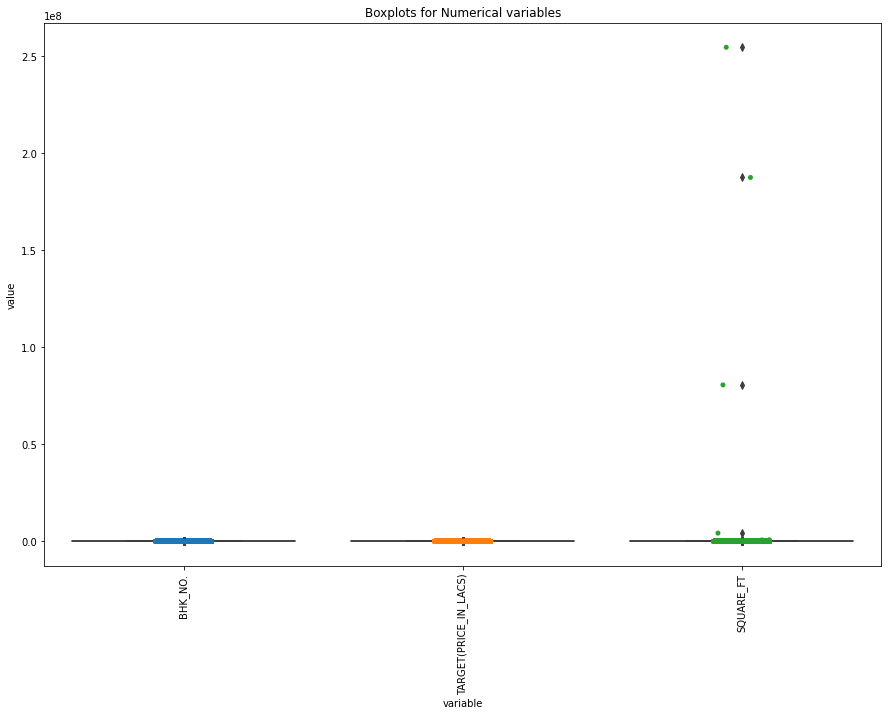

In [172]:
NumericData = data[['BHK_NO.', 'TARGET(PRICE_IN_LACS)', 'SQUARE_FT']]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [173]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in ['area', 'SQUARE_FT', 'BHK_NO.', 'TARGET(PRICE_IN_LACS)', 'PRICE_IN_LACS']:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'area': 3.55,
 'SQUARE_FT': 5.55,
 'BHK_NO.': 0.96,
 'TARGET(PRICE_IN_LACS)': 10.47,
 'PRICE_IN_LACS': 3.29}

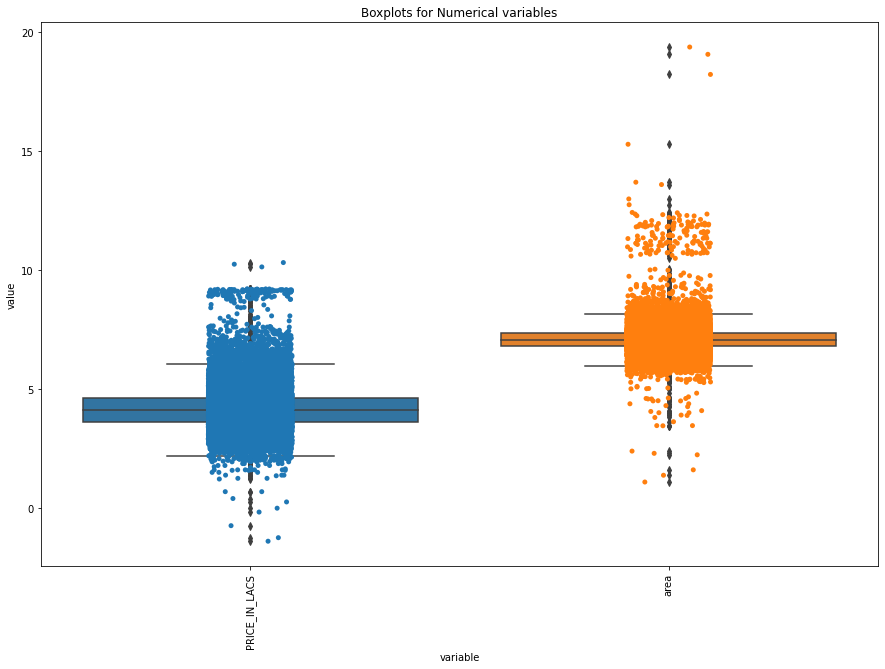

In [174]:
NumericData = data[['PRICE_IN_LACS', 'area']]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [175]:
# Outlier treatment by removal or replacement
df_outlier = data.copy()
for feature in ['area']:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)    
    # by replacing values
    #df_outlier.loc[data[feature]>(Upper_range), feature] = Upper_range
    #df_outlier.loc[data[feature]<(Lower_range), feature] = Lower_range
    
    # by dropping rows
    df_outlier = data[(data[feature]>Lower_range) & (data[feature]<Upper_range)].reset_index(drop=True)

In [176]:
df = data.copy()
path = cwd
for i, feature in enumerate(categorical_features):
    
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))
    # load classes
    columns = joblib.load(
        open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'rb'))

    if len(le.classes_)>2 and feature!='ADDRESS':
        # perform one hot encoding
        ohe.fit(df[[feature]])
        # save the encoder
        joblib.dump(ohe, 
                    open(os.path.join(path, "TextEncoding/ohe_{}.sav".format(feature)), 'wb'))

        # transfrom training data
        # removing first column of encoded data to elude from dummy variable trap
        tempData = ohe.transform(df[[feature]])[:, 1:]

        # create Dataframe with columns as classes
        tempData = pd.DataFrame(tempData, columns=columns)
    else:
        tempData = df[[feature]]
    
    # create dataframe with all the label encoded categorical features along with hot encoding
    if i==0:
        encodedData = pd.DataFrame(data=tempData, columns=tempData.columns.values.tolist())
    else:
        encodedData = pd.concat([encodedData, tempData], axis=1)

In [177]:
# merge numerical features and categorical encoded features
df = df[numerical_features+['TARGET(PRICE_IN_LACS)', 'PRICE_IN_LACS']]
df = pd.concat([df, encodedData], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   BHK_NO.                29451 non-null  int64  
 3   SQUARE_FT              29451 non-null  float64
 4   READY_TO_MOVE          29451 non-null  int64  
 5   RESALE                 29451 non-null  int64  
 6   LONGITUDE              29451 non-null  float64
 7   LATITUDE               29451 non-null  float64
 8   area                   29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
 10  PRICE_IN_LACS          29451 non-null  float64
 11  POSTED_BY Dealer       29451 non-null  float64
 12  POSTED_BY Owner        29451 non-null  float64
 13  BHK_OR_RK              29451 non-null  int64  
 14  city_tier tier2        29451 non-null  float64
 15  ci

In [178]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [179]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['READY_TO_MOVE', 'ADDRESS', 'TARGET(PRICE_IN_LACS)', 
                                                                             'SQUARE_FT', 'PRICE_IN_LACS'])]
print('features used: ', feature_cols)


features used:  ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area', 'POSTED_BY Dealer', 'POSTED_BY Owner', 'BHK_OR_RK', 'city_tier tier2', 'city_tier tier3']


In [180]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [181]:
model = XGBRegressor( 
    n_estimators = 500,
    learning_rate=0.02, 
    #min_child_weight=3,
    #max_depth = 3,
    #subsample = 0.8,
    seed=7)


model = model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    #early_stopping_rounds=20,
    #eval_set=[(X_test, y_test)],
    verbose=False)

In [182]:
y_pred = model.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = model.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  140.32968082601838
RMSE Scaled Data:  0.31634633967941106
r2_score:  95.72
Validation metrics...
RMSE Actual:  142.08419623185014
RMSE Scaled Data:  0.3514997980664254
r2_score:  93.66


In [183]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [184]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [185]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)

SVR()

In [186]:
y_pred = regr.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = regr.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  622.2161538213528
RMSE Scaled Data:  0.5781426180637532
r2_score:  15.8
Validation metrics...
RMSE Actual:  554.8021689186348
RMSE Scaled Data:  0.5775104498739367
r2_score:  3.26


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [188]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [189]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [190]:
y_pred = clf.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = clf.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  4.233723173795017
RMSE Scaled Data:  0.035599495755662826
r2_score:  100.0
Validation metrics...
RMSE Actual:  227.34910803989482
RMSE Scaled Data:  0.4591797101922371
r2_score:  83.76


In [191]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [192]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [193]:
from sklearn.neural_network import MLPRegressor
nnregr = MLPRegressor(random_state=1, max_iter=500)
nnregr.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [194]:
y_pred = clf.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = clf.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  4.233723173795017
RMSE Scaled Data:  0.035599495755662826
r2_score:  100.0
Validation metrics...
RMSE Actual:  227.34910803989482
RMSE Scaled Data:  0.4591797101922371
r2_score:  83.76


In [195]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [196]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [197]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=1, normalize=False)
reg.fit(X_train, y_train)

Lars(n_nonzero_coefs=1, normalize=False)

In [198]:
y_pred = reg.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = reg.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  682.4490716744458
RMSE Scaled Data:  0.900963765968651
r2_score:  -1.29
Validation metrics...
RMSE Actual:  568.2361669863207
RMSE Scaled Data:  0.8846485934513835
r2_score:  -1.48


In [199]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [200]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [201]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [202]:
y_pred = regr.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = regr.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  401.4707430644736
RMSE Scaled Data:  0.6703922837138395
r2_score:  64.95
Validation metrics...
RMSE Actual:  301.55902944934724
RMSE Scaled Data:  0.660846051486006
r2_score:  71.42


In [203]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [204]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [205]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

BayesianRidge()

In [206]:
y_pred = reg.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = reg.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  10040.562031401529
RMSE Scaled Data:  0.577036048391004
r2_score:  -21825.75
Validation metrics...
RMSE Actual:  392.6859765013736
RMSE Scaled Data:  0.5679629380144947
r2_score:  51.54


In [207]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()